In [186]:
import numpy as np
import pandas as pd
import re

In [188]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [190]:
df = pd.read_csv('../processed_data/gurgaon_properties_cleaned_v1.csv')

In [192]:
df.duplicated().sum()

120

In [194]:
df.head(1)

,property_type,society,sector,price,price_per_sq_ft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features
0,flat,sobha city,sector 108,3.95,16858.0,2343.101198,Super Built up area 2343(217.67 sq.m.)Carpet area: 1512.05 sq.ft. (140.47 sq.m.),3,5,2,servant room,15.0,North,0 to 1 Year Old,"['Dwarka Sector 21', 'Dwarka Expressway', 'Vasant Kunj', 'The Shikshiyan School', 'The NorthCap University', 'Rions Hospital', 'IGI Airport', 'Gurgaon', 'WTC Plaza', 'Luxus Haritma Resort', 'Fun N Food WaterPark', 'BSF Golf Course', 'Nehru Stadium']","['5 Geyser', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Modular Kitchen', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Power Back-up', 'Intercom Facility', 'Lift(s)', 'Centrally Air Conditioned', 'Water purifier', 'High Ceiling Height', 'Separate entry for servant room', 'No open drainage around', 'Recently Renovated', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']"


1.  areaWithType

In [197]:
df.sample(5)[['price','area','areaWithType']]

,price,area,areaWithType
1277,0.95,1452.155304,Super Built up area 1452(134.9 sq.m.)Carpet area: 849 sq.ft. (78.87 sq.m.)
3035,1.68,2010.050251,Super Built up area 2010(186.74 sq.m.)
3772,2.57,1630.090067,Carpet area: 1630 (151.43 sq.m.)
1499,10.50,402.000000,Plot area 402(37.35 sq.m.)
3047,1.25,1480.165779,Super Built up area 1480(137.5 sq.m.)


In [199]:
# This function extracts the Super Built up area
def get_super_built_up_area(text):
    text = str(text)
    match = re.search(r'Super Built up area (\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [201]:
# This function extracts the Built Up area or Carpet area
def get_area(text, area_type):
    text = str(text)
    match = re.search(area_type + r'\s*:\s*(\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [203]:
# This function checks if the area is provided in sq.m. and converts it to sqft if needed
def convert_to_sqft(text, area_value):
    if area_value is None:
        return None
    text = str(text)  # convert to string to avoid TypeError
    pattern = r'{} \((\d+\.?\d*) sq.m.\)'.format(area_value)
    match = re.search(pattern, text)
    if match:
        sq_m_value = float(match.group(1))
        return round(sq_m_value * 10.7639, 2)
    return area_value


In [205]:
# Extract Super Built up area and convert to sqft if needed
df['super_built_up_area'] = df['areaWithType'].apply(get_super_built_up_area)
df['super_built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['super_built_up_area']), axis=1)

# Extract Built Up area and convert to sqft if needed
df['built_up_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Built Up area'))
df['built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['built_up_area']), axis=1)

# Extract Carpet area and convert to sqft if needed
df['carpet_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Carpet area'))
df['carpet_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['carpet_area']), axis=1)

In [206]:
df[['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].sample(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
1389,1.32,flat,1569.373440,Super Built up area 1568(145.67 sq.m.),1568.0,NaN,NaN
1782,10.00,house,3240.000000,Plot area 360(301.01 sq.m.),NaN,NaN,NaN
457,1.14,flat,1900.000000,Super Built up area 1900(176.52 sq.m.)Built Up area: 1305 sq.ft. (121.24 sq.m.)Carpet area: 1173 sq.ft. (108.98 sq.m.),1900.0,1305.0,1173.0
2340,1.60,flat,2364.066194,Super Built up area 2364(219.62 sq.m.),2364.0,NaN,NaN
986,0.92,flat,1950.392198,Carpet area: 1950 (181.16 sq.m.),NaN,NaN,1950.0


In [209]:
df.duplicated().sum()

120

In [211]:
df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].shape

(534, 7)

In [213]:
df[df['areaWithType'].str.contains('Plot', na=False)][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].head(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
1,11.5,house,4680.0,Plot area 520(434.79 sq.m.),NaN,NaN,NaN
2,4.5,house,4950.0,Plot area 550(459.87 sq.m.),NaN,NaN,NaN
5,0.7,house,999.0,Plot area 111(92.81 sq.m.),NaN,NaN,NaN
8,5.0,house,2340.0,Plot area 260(217.39 sq.m.),NaN,NaN,NaN
11,1.5,house,1980.0,Plot area 220(183.95 sq.m.),NaN,NaN,NaN


In [215]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                    18
price_per_sq_ft          18
area                     18
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum                 19
facing                 1105
agePossession             1
nearbyLocations         177
furnishDetails          981
features                635
super_built_up_area    1888
built_up_area          2616
carpet_area            1859
dtype: int64

In [217]:
all_nan_df = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']]

In [219]:
all_nan_df.head()

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
1,11.5,house,4680.0,Plot area 520(434.79 sq.m.),NaN,NaN,NaN
2,4.5,house,4950.0,Plot area 550(459.87 sq.m.),NaN,NaN,NaN
5,0.7,house,999.0,Plot area 111(92.81 sq.m.),NaN,NaN,NaN
8,5.0,house,2340.0,Plot area 260(217.39 sq.m.),NaN,NaN,NaN
11,1.5,house,1980.0,Plot area 220(183.95 sq.m.),NaN,NaN,NaN


In [221]:
all_nan_index = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].index

In [223]:
# Function to extract plot area from 'areaWithType' column
def extract_plot_area(area_with_type):
    area_str = str(area_with_type) 
    match = re.search(r'Plot area (\d+\.?\d*)', area_str)
    return float(match.group(1)) if match else None

In [225]:
all_nan_df['built_up_area'] = all_nan_df['areaWithType'].apply(extract_plot_area)

In [227]:
all_nan_df

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
1,11.50,house,4680.0,Plot area 520(434.79 sq.m.),NaN,520.00,NaN
2,4.50,house,4950.0,Plot area 550(459.87 sq.m.),NaN,550.00,NaN
5,0.70,house,999.0,Plot area 111(92.81 sq.m.),NaN,111.00,NaN
8,5.00,house,2340.0,Plot area 260(217.39 sq.m.),NaN,260.00,NaN
11,1.50,house,1980.0,Plot area 220(183.95 sq.m.),NaN,220.00,NaN
16,2.25,house,900.0,Plot area 100(83.61 sq.m.),NaN,100.00,NaN
25,3.85,house,2628.0,Plot area 292(244.15 sq.m.),NaN,292.00,NaN
31,6.21,house,2700.0,Plot area 300(250.84 sq.m.),NaN,300.00,NaN
34,8.00,house,3042.0,Plot area 338(282.61 sq.m.),NaN,338.00,NaN
35,6.30,house,1800.0,Plot area 200(167.23 sq.m.),NaN,200.00,NaN


In [228]:
def convert_scale(row):
    try:
        area = float(row['area'])
        built_up = float(row['built_up_area'])

        if pd.isna(area) or pd.isna(built_up):
            return built_up

        ratio = area / built_up

        if round(ratio) == 9:
            return built_up * 9
        elif round(ratio) == 11:
            return built_up * 10.7
        else:
            return built_up

    except (ValueError, TypeError):
        return row['built_up_area']


In [229]:
all_nan_df['built_up_area'] = all_nan_df.apply(convert_scale,axis=1)

In [230]:
all_nan_df

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
1,11.50,house,4680.0,Plot area 520(434.79 sq.m.),NaN,4680.00,NaN
2,4.50,house,4950.0,Plot area 550(459.87 sq.m.),NaN,4950.00,NaN
5,0.70,house,999.0,Plot area 111(92.81 sq.m.),NaN,999.00,NaN
8,5.00,house,2340.0,Plot area 260(217.39 sq.m.),NaN,2340.00,NaN
11,1.50,house,1980.0,Plot area 220(183.95 sq.m.),NaN,1980.00,NaN
16,2.25,house,900.0,Plot area 100(83.61 sq.m.),NaN,900.00,NaN
25,3.85,house,2628.0,Plot area 292(244.15 sq.m.),NaN,2628.00,NaN
31,6.21,house,2700.0,Plot area 300(250.84 sq.m.),NaN,2700.00,NaN
34,8.00,house,3042.0,Plot area 338(282.61 sq.m.),NaN,3042.00,NaN
35,6.30,house,1800.0,Plot area 200(167.23 sq.m.),NaN,1800.00,NaN


In [231]:
# update the original dataframe
df.update(all_nan_df)

In [232]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                    18
price_per_sq_ft          18
area                     18
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum                 19
facing                 1105
agePossession             1
nearbyLocations         177
furnishDetails          981
features                635
super_built_up_area    1888
built_up_area          2070
carpet_area            1859
dtype: int64

In [233]:
df.head()

,property_type,society,sector,price,price_per_sq_ft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area
0,flat,sobha city,sector 108,3.95,16858.0,2343.101198,Super Built up area 2343(217.67 sq.m.)Carpet area: 1512.05 sq.ft. (140.47 sq.m.),3,5,2,servant room,15.0,North,0 to 1 Year Old,"['Dwarka Sector 21', 'Dwarka Expressway', 'Vasant Kunj', 'The Shikshiyan School', 'The NorthCap University', 'Rions Hospital', 'IGI Airport', 'Gurgaon', 'WTC Plaza', 'Luxus Haritma Resort', 'Fun N Food WaterPark', 'BSF Golf Course', 'Nehru Stadium']","['5 Geyser', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Modular Kitchen', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Power Back-up', 'Intercom Facility', 'Lift(s)', 'Centrally Air Conditioned', 'Water purifier', 'High Ceiling Height', 'Separate entry for servant room', 'No open drainage around', 'Recently Renovated', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']",2343.0,NaN,1512.05
1,house,unitech uniworld resorts,sector 33,11.50,24573.0,4680.000000,Plot area 520(434.79 sq.m.),5,6,3+,servant room,4.0,East,1 to 5 Year Old,"['Rajiv Chowk Mosque', 'Icici bank ATM', 'Standard chartered ATM', 'Samvit Health Care', 'Airforce Hospital', 'Medanta', ""DR AKRAM JAWED'S THE UPPER LIMB CLINIC"", 'Sukhmani Hospital Pvt. Ltd', 'Vaishnavi Nursing Home', 'Best Urologist Atcomplete Family Clinic', 'Ayushman Hospital And Trauma Centre', 'Park Hospital Gurgaon', 'Wellness Eye Centre', 'Neelkanth Health Care', 'Dr. Aruna Kalra', 'Vishesh Dental', 'Smile Plus Dental Clinic', 'Dr. Anuj Sharma', 'Dr. Naresh Pandita', 'Bansal Medicare and Maternity Centre', 'Pushpanjali Hospital Gurgaon', 'Shri Ram Dental Clinic', 'Sunrise Hospital Gurgaon', 'Meher Clinic', 'Rajendra Hospital', 'Pushpanjali Hospital', 'Sai Dental Clinic', 'Nutan Dental Hospital', 'Parmar Dental Clinic & Lab', 'Road and Traffic Authority', 'Gurgaon Election Commission', 'Apollo Pharmacy', 'Gardian Pharmacy', 'Genius', 'India Oil', 'SRS Cinemas', 'SRS Cinemas', 'Hdfc bank', 'Icici bank', 'Hdfc bank', 'KFC', 'Haldiram', ""Domino's Pizza"", ""Nirula's"", 'Kendriya Vidyalaya No.2 Sohna Road', 'Delhi Public School Primary Section']","['5 Wardrobe', '6 Fan', '18 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Private Garden / Terrace', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Recently Renovated', 'Visitor Parking', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal']",NaN,4680.0,NaN
2,house,independent,sector 13,4.50,9091.0,4950.000000,Plot area 550(459.87 sq.m.),4,5,2,not available,2.0,East,10+ Year Old,"['Hanuman Mandir', 'Sheetla Mata Mandir', 'Lotus Hospital Gurgaon', 'Mamta Hospital Gurgaon', 'Saraswati Hospital Gurgaon', 'Ahooja Eye and Dental Institute Hospital', 'Jackson Hospital', 'Dr. Sandeep Chauhan', 'Nidhi Clinic', 'Dental Health Centre', 'Kalyani Hospital Gurgaon', 'Dr. Babita Sharma', 'M Goel Hospital', 'Nova Care Clinic', 'Verma E.N.T. Hospital', 'Dr. Tomar Clinic', 'Lall Nursing and Maternity Home', 'Lalit Dental Care', 'Om Charitable Dental & Implant Centre', 'Lall Eye Care Centre', 'Dentecare - Multispeciality Dental Clinic', 'Children Hospital', 'Kharbanda Maternity and Nursing Home', 'Kidney Clinic', 'Centre For Sight Gurgaon New Railway Road', 'Gupta Hospital Gurgaon'

2.additionalRoom

In [235]:
df['additionalRoom'].value_counts()

additionalRoom
not available                                    1587
servant room                                      705
study room                                        250
others                                            225
pooja room                                        165
study room,servant room                            99
store room                                         99
pooja room,servant room                            82
pooja room,study room,servant room,store room      72
servant room,others                                60
pooja room,study room,servant room                 55
pooja room,study room,servant room,others          54
servant room,pooja room                            38
servant room,store room                            33
study room,others                                  29
pooja room,study room                              22
pooja room,others                                  17
pooja room,store room                              15
pooja room,st

In [236]:
# additional room
# List of new columns to be created
new_cols = ['study room', 'servant room', 'store room', 'pooja room', 'others']

# Populate the new columns based on the "additionalRoom" column
for col in new_cols:
    df[col] = df['additionalRoom'].fillna('').str.contains(col, case=False).astype(int)

In [237]:
df.sample(5)[['additionalRoom','study room', 'servant room', 'store room', 'pooja room', 'others']]

,additionalRoom,study room,servant room,store room,pooja room,others
383,not available,0,0,0,0,0
3086,not available,0,0,0,0,0
3539,servant room,0,1,0,0,0
300,servant room,0,1,0,0,0
471,"study room,pooja room,store room",1,0,1,1,0


In [238]:
df.head()

,property_type,society,sector,price,price_per_sq_ft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
0,flat,sobha city,sector 108,3.95,16858.0,2343.101198,Super Built up area 2343(217.67 sq.m.)Carpet area: 1512.05 sq.ft. (140.47 sq.m.),3,5,2,servant room,15.0,North,0 to 1 Year Old,"['Dwarka Sector 21', 'Dwarka Expressway', 'Vasant Kunj', 'The Shikshiyan School', 'The NorthCap University', 'Rions Hospital', 'IGI Airport', 'Gurgaon', 'WTC Plaza', 'Luxus Haritma Resort', 'Fun N Food WaterPark', 'BSF Golf Course', 'Nehru Stadium']","['5 Geyser', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Modular Kitchen', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Power Back-up', 'Intercom Facility', 'Lift(s)', 'Centrally Air Conditioned', 'Water purifier', 'High Ceiling Height', 'Separate entry for servant room', 'No open drainage around', 'Recently Renovated', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']",2343.0,NaN,1512.05,0,1,0,0,0
1,house,unitech uniworld resorts,sector 33,11.50,24573.0,4680.000000,Plot area 520(434.79 sq.m.),5,6,3+,servant room,4.0,East,1 to 5 Year Old,"['Rajiv Chowk Mosque', 'Icici bank ATM', 'Standard chartered ATM', 'Samvit Health Care', 'Airforce Hospital', 'Medanta', ""DR AKRAM JAWED'S THE UPPER LIMB CLINIC"", 'Sukhmani Hospital Pvt. Ltd', 'Vaishnavi Nursing Home', 'Best Urologist Atcomplete Family Clinic', 'Ayushman Hospital And Trauma Centre', 'Park Hospital Gurgaon', 'Wellness Eye Centre', 'Neelkanth Health Care', 'Dr. Aruna Kalra', 'Vishesh Dental', 'Smile Plus Dental Clinic', 'Dr. Anuj Sharma', 'Dr. Naresh Pandita', 'Bansal Medicare and Maternity Centre', 'Pushpanjali Hospital Gurgaon', 'Shri Ram Dental Clinic', 'Sunrise Hospital Gurgaon', 'Meher Clinic', 'Rajendra Hospital', 'Pushpanjali Hospital', 'Sai Dental Clinic', 'Nutan Dental Hospital', 'Parmar Dental Clinic & Lab', 'Road and Traffic Authority', 'Gurgaon Election Commission', 'Apollo Pharmacy', 'Gardian Pharmacy', 'Genius', 'India Oil', 'SRS Cinemas', 'SRS Cinemas', 'Hdfc bank', 'Icici bank', 'Hdfc bank', 'KFC', 'Haldiram', ""Domino's Pizza"", ""Nirula's"", 'Kendriya Vidyalaya No.2 Sohna Road', 'Delhi Public School Primary Section']","['5 Wardrobe', '6 Fan', '18 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Private Garden / Terrace', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Recently Renovated', 'Visitor Parking', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal']",NaN,4680.0,NaN,0,1,0,0,0
2,house,independent,sector 13,4.50,9091.0,4950.000000,Plot area 550(459.87 sq.m.),4,5,2,not available,2.0,East,10+ Year Old,"['Hanuman Mandir', 'Sheetla Mata Mandir', 'Lotus Hospital Gurgaon', 'Mamta Hospital Gurgaon', 'Saraswati Hospital Gurgaon', 'Ahooja Eye and Dental Institute Hospital', 'Jackson Hospital', 'Dr. Sandeep Chauhan', 'Nidhi Clinic', 'Dental Health Centre', 'Kalyani Hospital Gurgaon', 'Dr. Babita Sharma', 'M Goel Hospital', 'Nova Care Clinic', 'Verma E.N.T. Hospital', 'Dr. Tomar Clinic', 'Lall Nursing and Maternity Home', 'Lalit Dental Care', 'Om Charitable Dental & Implant Centre', 'Lall Eye Care Centre', 'Dentecare - Multispeciality Dental Clinic', 'Children Hospital', 'Kharbanda Maternity and Nursing Home', 'Kidney Clini

3.agePossession

In [240]:
df['agePossession'].value_counts()

agePossession
1 to 5 Year Old       1676
5 to 10 Year Old       575
0 to 1 Year Old        530
undefined              332
10+ Year Old           310
Under Construction      90
Within 6 months         70
Within 3 months         26
Dec 2023                22
By 2023                 19
By 2024                 17
Dec 2024                16
Mar 2024                14
Oct 2024                 8
Jan 2024                 8
Jun 2024                 7
Aug 2023                 7
Dec 2025                 7
Nov 2023                 5
Aug 2024                 4
Jul 2024                 4
Oct 2023                 4
Sep 2023                 4
By 2025                  4
May 2024                 3
Nov 2024                 3
Jan 2025                 3
Feb 2024                 3
Jun 2027                 2
Oct 2025                 2
Jul 2025                 2
Dec 2026                 2
Sep 2025                 2
Mar 2025                 2
Aug 2025                 2
Jan 2026                 2
By 2027       

In [241]:
def categorize_age_possession(value):
    if pd.isna(value):
        return "Undefined"
    if "0 to 1 Year Old" in value or "Within 6 months" in value or "Within 3 months" in value:
        return "New Property"
    if "1 to 5 Year Old" in value:
        return "Relatively New"
    if "5 to 10 Year Old" in value:
        return "Moderately Old"
    if "10+ Year Old" in value:
        return "Old Property"
    if "Under Construction" in value or "By" in value:
        return "Under Construction"
    try:
        # For entries like 'May 2024'
        int(value.split(" ")[-1])
        return "Under Construction"
    except:
        return "Undefined"

In [242]:
df['agePossession'] = df['agePossession'].apply(categorize_age_possession)

In [243]:
df['agePossession'].value_counts()

agePossession
Relatively New        1676
New Property           626
Moderately Old         575
Undefined              333
Old Property           310
Under Construction     283
Name: count, dtype: int64

In [244]:
df.head()

,property_type,society,sector,price,price_per_sq_ft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
0,flat,sobha city,sector 108,3.95,16858.0,2343.101198,Super Built up area 2343(217.67 sq.m.)Carpet area: 1512.05 sq.ft. (140.47 sq.m.),3,5,2,servant room,15.0,North,New Property,"['Dwarka Sector 21', 'Dwarka Expressway', 'Vasant Kunj', 'The Shikshiyan School', 'The NorthCap University', 'Rions Hospital', 'IGI Airport', 'Gurgaon', 'WTC Plaza', 'Luxus Haritma Resort', 'Fun N Food WaterPark', 'BSF Golf Course', 'Nehru Stadium']","['5 Geyser', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Modular Kitchen', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Power Back-up', 'Intercom Facility', 'Lift(s)', 'Centrally Air Conditioned', 'Water purifier', 'High Ceiling Height', 'Separate entry for servant room', 'No open drainage around', 'Recently Renovated', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']",2343.0,NaN,1512.05,0,1,0,0,0
1,house,unitech uniworld resorts,sector 33,11.50,24573.0,4680.000000,Plot area 520(434.79 sq.m.),5,6,3+,servant room,4.0,East,Relatively New,"['Rajiv Chowk Mosque', 'Icici bank ATM', 'Standard chartered ATM', 'Samvit Health Care', 'Airforce Hospital', 'Medanta', ""DR AKRAM JAWED'S THE UPPER LIMB CLINIC"", 'Sukhmani Hospital Pvt. Ltd', 'Vaishnavi Nursing Home', 'Best Urologist Atcomplete Family Clinic', 'Ayushman Hospital And Trauma Centre', 'Park Hospital Gurgaon', 'Wellness Eye Centre', 'Neelkanth Health Care', 'Dr. Aruna Kalra', 'Vishesh Dental', 'Smile Plus Dental Clinic', 'Dr. Anuj Sharma', 'Dr. Naresh Pandita', 'Bansal Medicare and Maternity Centre', 'Pushpanjali Hospital Gurgaon', 'Shri Ram Dental Clinic', 'Sunrise Hospital Gurgaon', 'Meher Clinic', 'Rajendra Hospital', 'Pushpanjali Hospital', 'Sai Dental Clinic', 'Nutan Dental Hospital', 'Parmar Dental Clinic & Lab', 'Road and Traffic Authority', 'Gurgaon Election Commission', 'Apollo Pharmacy', 'Gardian Pharmacy', 'Genius', 'India Oil', 'SRS Cinemas', 'SRS Cinemas', 'Hdfc bank', 'Icici bank', 'Hdfc bank', 'KFC', 'Haldiram', ""Domino's Pizza"", ""Nirula's"", 'Kendriya Vidyalaya No.2 Sohna Road', 'Delhi Public School Primary Section']","['5 Wardrobe', '6 Fan', '18 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Private Garden / Terrace', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Recently Renovated', 'Visitor Parking', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal']",NaN,4680.0,NaN,0,1,0,0,0
2,house,independent,sector 13,4.50,9091.0,4950.000000,Plot area 550(459.87 sq.m.),4,5,2,not available,2.0,East,Old Property,"['Hanuman Mandir', 'Sheetla Mata Mandir', 'Lotus Hospital Gurgaon', 'Mamta Hospital Gurgaon', 'Saraswati Hospital Gurgaon', 'Ahooja Eye and Dental Institute Hospital', 'Jackson Hospital', 'Dr. Sandeep Chauhan', 'Nidhi Clinic', 'Dental Health Centre', 'Kalyani Hospital Gurgaon', 'Dr. Babita Sharma', 'M Goel Hospital', 'Nova Care Clinic', 'Verma E.N.T. Hospital', 'Dr. Tomar Clinic', 'Lall Nursing and Maternity Home', 'Lalit Dental Care', 'Om Charitable Dental & Implant Centre', 'Lall Eye Care Centre', 'Dentecare - Multispeciality Dental Clinic', 'Children Hospital', 'Kharbanda Maternity and Nursing Home', 'Kidney Clinic', 

4.furnishDetails

In [246]:
df.sample(5)[['furnishDetails','features']]

,furnishDetails,features
2198,NaN,['Water Storage']
3117,"['5 Fan', '2 Geyser', '7 Light', '2 Wardrobe', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'No open drainage around', 'Recently Renovated', 'Visitor Parking', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Waste Disposal', 'Rain Water Harvesting']"
2294,"['4 Fan', '5 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']"
2106,"['1 Water Purifier', '17 Fan', '1 Fridge', '1 Exhaust Fan', '1 Dining Table', '4 Geyser', '1 Stove', '19 Light', '9 Curtains', '5 AC', '1 Modular Kitchen', '2 TV', '3 Chimney', '13 Wardrobe', '1 Sofa', '1 Washing Machine', '3 Microwave', 'No Bed']","['Private Garden / Terrace', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking', 'Waste Disposal', 'Rain Water Harvesting']"
2885,"['5 Wardrobe', '1 Stove', '1 Microwave', '20 Light', '10 AC', '1 Chimney', '1 Modular Kitchen', 'No Bed', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Fridge', 'No Sofa', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']"


In [247]:
# Extract all unique furnishings from the furnishDetails column
all_furnishings = []
for detail in df['furnishDetails'].dropna():
    furnishings = detail.replace('[', '').replace(']', '').replace("'", "").split(', ')
    all_furnishings.extend(furnishings)
unique_furnishings = list(set(all_furnishings))

# Define a function to extract the count of a furnishing from the furnishDetails
def get_furnishing_count(details, furnishing):
    if isinstance(details, str):
        if f"No {furnishing}" in details:
            return 0
        pattern = re.compile(rf"(\d+)\s+{re.escape(furnishing)}")

        match = pattern.search(details)
        if match:
            return int(match.group(1))
        elif furnishing in details:
            return 1
    return 0

# Simplify the furnishings list by removing "No" prefix and numbers
columns_to_include = [re.sub(r'No |\d+', '', furnishing).strip() for furnishing in unique_furnishings]
columns_to_include = list(set(columns_to_include))  # Get unique furnishings
columns_to_include = [furnishing for furnishing in columns_to_include if furnishing]  # Remove empty strings

# Create new columns for each unique furnishing and populate with counts
for furnishing in columns_to_include:
    df[furnishing] = df['furnishDetails'].apply(lambda x: get_furnishing_count(x, furnishing))

# Create the new dataframe with the required columns
furnishings_df = df[['furnishDetails'] + columns_to_include]

In [248]:
furnishings_df.shape

(3803, 19)

In [249]:
furnishings_df.drop(columns=['furnishDetails'],inplace=True)

C:\Users\ANSHUMAN\AppData\Local\Temp\ipykernel_14148\114705885.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  furnishings_df.drop(columns=['furnishDetails'],inplace=True)


In [261]:
furnishings_df.sample(5)

,Water Purifier,Exhaust Fan,Chimney,Geyser,Dining Table,AC,Sofa,Light,TV,Stove,Microwave,Modular Kitchen,Fan,Bed,Wardrobe,Curtains,Washing Machine,Fridge
3709,0,1,1,4,0,4,0,18,0,1,1,1,0,0,0,1,0,0
1759,0,1,0,0,0,5,0,4,0,1,0,1,5,0,0,0,0,0
2185,0,0,1,0,0,5,0,0,0,1,0,1,0,0,0,0,0,0
2965,0,1,1,5,0,7,0,69,0,1,0,1,9,0,4,0,0,0
55,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [267]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [269]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(furnishings_df)

In [273]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss_reduced.append(kmeans.inertia_)

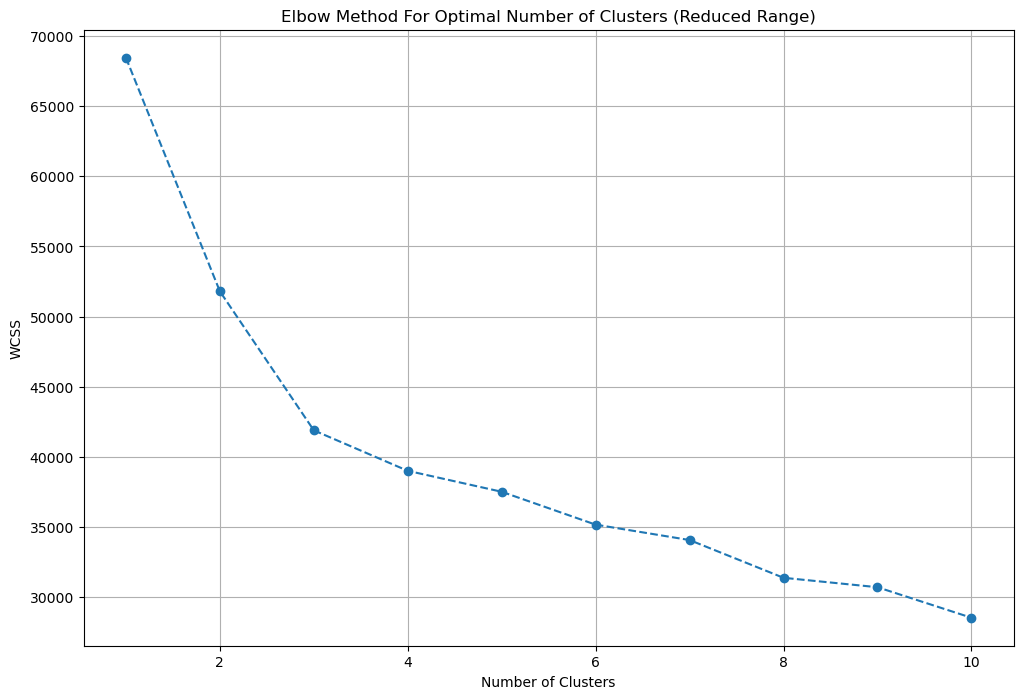

In [274]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [275]:
n_clusters = 3

# Fit the KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_data)

# Predict the cluster assignments for each row
cluster_assignments = kmeans.predict(scaled_data)

In [277]:
df = df.iloc[:,:-18]

In [280]:
df['furnishing_type'] = cluster_assignments

In [281]:
df.sample(5)[['furnishDetails','furnishing_type']]
# 0 -> unfurnished
# 1 -> semifurnished
# 2 -> furnished

,furnishDetails,furnishing_type
343,"['2 Wardrobe', '1 Light', '1 Modular Kitchen', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",1
386,[],1
350,NaN,1
3101,"['1 Wardrobe', '4 Fan', '1 Exhaust Fan', '10 Light', '1 Modular Kitchen', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Geyser', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",2
2296,NaN,1


5.features

In [283]:
df[['society','features']].sample(5)

,society,features
3638,dlf the ultima,"['Water purifier', 'Centrally Air Conditioned', 'Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"
1906,mapsko royale ville,"['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"
516,experion the heartsong,"['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"
3504,signature global park,NaN
3256,ansal estella,"['Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Swimming Pool', 'Park', 'Security Personnel', 'Internet/wi-fi connectivity', 'Fitness Centre / GYM', 'Club house / Community Center']"


In [291]:
df['features'].isnull().sum()

635

In [293]:
import pandas as pd
app_df = pd.read_csv('../raw_data/appartments.csv')
app_df.head(2)

,PropertyName,PropertySubName,NearbyLocations,LocationAdvantages,Link,PriceDetails,TopFacilities
0,Smartworld One DXP,"2, 3, 4 BHK Apartment in Sector 113, Gurgaon","['Bajghera Road', 'Palam Vihar Halt', 'DPSG Palam Vihar', 'Park Hospital', 'Gurgaon Railway Station']","{'Bajghera Road': '800 Meter', 'Palam Vihar Halt': '2.5 KM', 'DPSG Palam Vihar': '3.1 KM', 'Park Hospital': '3.1 KM', 'Gurgaon Railway Station': '4.9 KM', 'The NorthCap University': '5.4 KM', 'Dwarka Expy': '1.2 KM', 'Hyatt Place Gurgaon Udyog Vihar': '7.7 KM', 'Dwarka Sector 21, Metro Station': '7.2 KM', 'Pacific D21 Mall': '7.4 KM', 'Indira Gandhi International Airport': '14.7 KM', 'Hamoni Golf Camp': '6.2 KM', 'Fun N Food Waterpark': '8.8 KM', 'Accenture DDC5': '9 KM'}",https://www.99acres.com/smartworld-one-dxp-sector-113-gurgaon-npxid-r400415,"{'2 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,370 sq.ft.', 'price-range': '₹ 2 - 2.4 Cr'}, '3 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,850 - 2,050 sq.ft.', 'price-range': '₹ 2.25 - 3.59 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '2,600 sq.ft.', 'price-range': '₹ 3.24 - 4.56 Cr'}}","['Swimming Pool', 'Salon', 'Restaurant', 'Spa', 'Cafeteria', 'Sun Deck', '24x7 Security', 'Club House', 'Gated Community']"
1,M3M Crown,"3, 4 BHK Apartment in Sector 111, Gurgaon","['DPSG Palam Vihar Gurugram', 'The NorthCap University', 'Park Hospital, Palam Vihar', 'Pacific D21 Mall', 'Palam Vihar Halt Railway Station']","{'DPSG Palam Vihar Gurugram': '1.4 Km', 'The NorthCap University': '4.4 Km', 'Park Hospital, Palam Vihar': '1.4 Km', 'Pacific D21 Mall': '8.2 Km', 'Palam Vihar Halt Railway Station': '1.2 Km', 'Dwarka Sector 21 Metro Station': '8.1 Km', 'Dwarka Expressway': '450 m', 'Fun N Food Water Park': '8.1 Km', 'Indira Gandhi International Airport': '14.1 Km', 'Tau DeviLal Sports Complex': '11.2 Km', 'Hamoni Golf Camp': '5 Km', 'Hyatt Place': '6.1 Km', 'Altrade Business Centre': '11.2 Km'}",https://www.99acres.com/m3m-crown-sector-111-gurgaon-npxid-r404068,"{'3 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '1,605 - 2,170 sq.ft.', 'price-range': '₹ 2.2 - 3.03 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '2,248 - 2,670 sq.ft.', 'price-range': '₹ 3.08 - 3.73 Cr'}}","['Bowling Alley', 'Mini Theatre', 'Manicured Garden', 'Swimming Pool', 'Flower Garden', 'Reading Lounge', 'Golf Course', 'Barbecue', 'Sauna']"


In [295]:
app_df['PropertyName'] = app_df['PropertyName'].str.lower()

In [297]:
temp_df = df[df['features'].isnull()]

In [299]:
temp_df.shape

(635, 26)

In [301]:
x = temp_df.merge(app_df,left_on='society',right_on='PropertyName',how='left')['TopFacilities']

In [303]:
df.loc[temp_df.index,'features'] = x.values

In [305]:
df['features'].isnull().sum()

481

In [307]:
from sklearn.preprocessing import MultiLabelBinarizer
import ast

In [309]:
# Convert the string representation of lists in the 'features' column to actual lists
df['features_list'] = df['features'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) and x.startswith('[') else [])

# Use MultiLabelBinarizer to convert the features list into a binary matrix
mlb = MultiLabelBinarizer()
features_binary_matrix = mlb.fit_transform(df['features_list'])

# Convert the binary matrix into a DataFrame
features_binary_df = pd.DataFrame(features_binary_matrix, columns=mlb.classes_)

In [310]:
features_binary_df.sample(5)

,24/7 Power Backup,24/7 Water Supply,24x7 Security,ATM,Aerobics Centre,Air Hockey,Airy Rooms,Amphitheatre,Automated Car Wash,Badminton Court,Bank Attached Property,Banquet Hall,Bar/Chill-Out Lounge,Barbecue,Basketball Court,Beach Volley Ball Court,Billiards,Bowling Alley,Bus Shelter,Business Lounge,CCTV Camera Security,Cafeteria,Car Parking,Car wash area,Card Room,Centrally Air Conditioned,Changing Area,Children's Play Area,Cigar Lounge,Clinic,Club House,Club house / Community Center,Community Hall,Concierge Service,Conference room,Creche/Day care,Cricket Pitch,Doctor on Call,Earthquake Resistant,Entrance Lobby,False Ceiling Lighting,Feng Shui / Vaastu Compliant,Fire Fighting Systems,Fitness Centre / GYM,Flower Garden,Food Court,Foosball,Football,Fountain,Gated Community,Gazebo,Golf Course,Grocery Shop,Gymnasium,High Ceiling Height,High Speed Elevators,Infinity Pool,Intercom Facility,Internal Street Lights,Internet/wi-fi connectivity,Jacuzzi,Jogging Track,Landscape Garden,Laundry,Lawn Tennis Court,Library,Lift(s),Lounge,Low Density Society,Maintenance Staff,Manicured Garden,Medical Centre,Milk Booth,Mini Theatre,Multipurpose Court,Multipurpose Hall,Natural Light,Natural Pond,No open drainage around,Park,Party Lawn,Pergola,Piped Gas,Piped-gas,Pool Table,Power Back up Lift,Power Back-up,Private Garden / Terrace,Property Staff,RO System,Rain Water Harvesting,Reading Lounge,Recently Renovated,Reflexology Park,Restaurant,Salon,Sauna,School,Security / Fire Alarm,Security Personnel,Separate entry for servant room,Sewage Treatment Plant,Shopping Centre,Skating Rink,Solar Lighting,Solar Water Heating,Spa,Spacious Interiors,Squash Court,Steam Room,Sun Deck,Swimming Pool,Temple,Terrace Garden,Theatre,Toddler Pool,Valet Parking,Vastu Compliant,Video Door Security,Visitor Parking,Visitors Parking,Volley Ball Court,Waiting Lounge,Waste Disposal,Water Softener Plant,Water Storage,Water purifier,Water softening plant,Wi-Fi Connectivity,Yoga/Meditation Area
243,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1918,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
583,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0
73,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
878,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


In [311]:
features_binary_df.shape

(3803, 130)

In [313]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(features_binary_df)
    wcss_reduced.append(kmeans.inertia_)

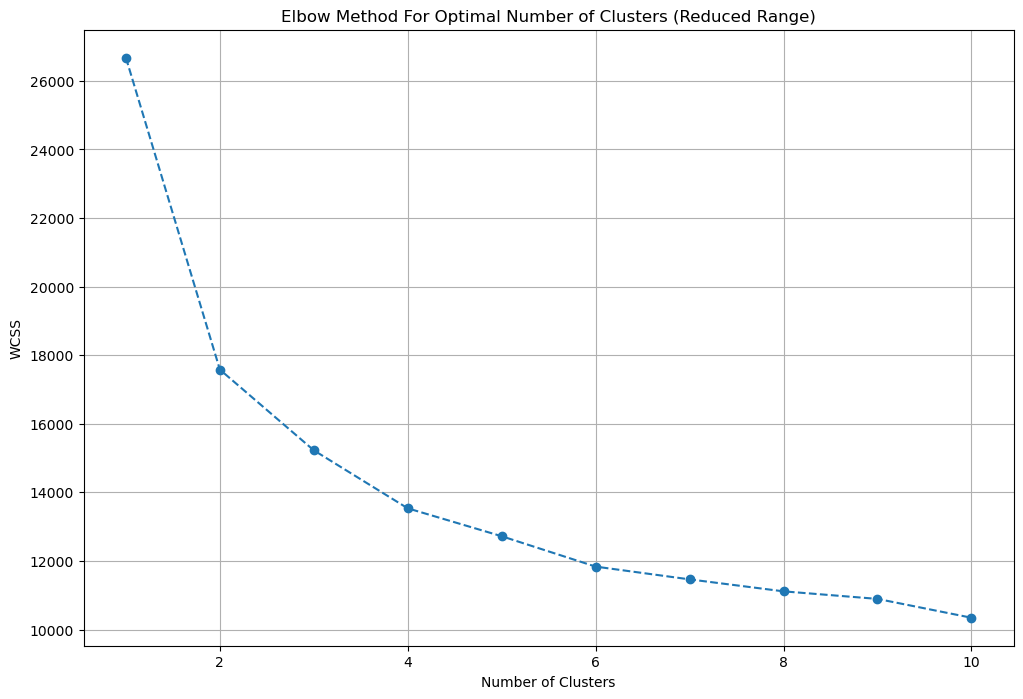

In [316]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [317]:
# Define the weights for each feature as provided
# Assigning weights based on perceived luxury contribution
weights = {
    '24/7 Power Backup': 8,
    '24/7 Water Supply': 4,
    '24x7 Security': 7,
    'ATM': 4,
    'Aerobics Centre': 6,
    'Airy Rooms': 8,
    'Amphitheatre': 7,
    'Badminton Court': 7,
    'Banquet Hall': 8,
    'Bar/Chill-Out Lounge': 9,
    'Barbecue': 7,
    'Basketball Court': 7,
    'Billiards': 7,
    'Bowling Alley': 8,
    'Business Lounge': 9,
    'CCTV Camera Security': 8,
    'Cafeteria': 6,
    'Car Parking': 6,
    'Card Room': 6,
    'Centrally Air Conditioned': 9,
    'Changing Area': 6,
    "Children's Play Area": 7,
    'Cigar Lounge': 9,
    'Clinic': 5,
    'Club House': 9,
    'Concierge Service': 9,
    'Conference room': 8,
    'Creche/Day care': 7,
    'Cricket Pitch': 7,
    'Doctor on Call': 6,
    'Earthquake Resistant': 5,
    'Entrance Lobby': 7,
    'False Ceiling Lighting': 6,
    'Feng Shui / Vaastu Compliant': 5,
    'Fire Fighting Systems': 8,
    'Fitness Centre / GYM': 8,
    'Flower Garden': 7,
    'Food Court': 6,
    'Foosball': 5,
    'Football': 7,
    'Fountain': 7,
    'Gated Community': 7,
    'Golf Course': 10,
    'Grocery Shop': 6,
    'Gymnasium': 8,
    'High Ceiling Height': 8,
    'High Speed Elevators': 8,
    'Infinity Pool': 9,
    'Intercom Facility': 7,
    'Internal Street Lights': 6,
    'Internet/wi-fi connectivity': 7,
    'Jacuzzi': 9,
    'Jogging Track': 7,
    'Landscape Garden': 8,
    'Laundry': 6,
    'Lawn Tennis Court': 8,
    'Library': 8,
    'Lounge': 8,
    'Low Density Society': 7,
    'Maintenance Staff': 6,
    'Manicured Garden': 7,
    'Medical Centre': 5,
    'Milk Booth': 4,
    'Mini Theatre': 9,
    'Multipurpose Court': 7,
    'Multipurpose Hall': 7,
    'Natural Light': 8,
    'Natural Pond': 7,
    'Park': 8,
    'Party Lawn': 8,
    'Piped Gas': 7,
    'Pool Table': 7,
    'Power Back up Lift': 8,
    'Private Garden / Terrace': 9,
    'Property Staff': 7,
    'RO System': 7,
    'Rain Water Harvesting': 7,
    'Reading Lounge': 8,
    'Restaurant': 8,
    'Salon': 8,
    'Sauna': 9,
    'Security / Fire Alarm': 9,
    'Security Personnel': 9,
    'Separate entry for servant room': 8,
    'Sewage Treatment Plant': 6,
    'Shopping Centre': 7,
    'Skating Rink': 7,
    'Solar Lighting': 6,
    'Solar Water Heating': 7,
    'Spa': 9,
    'Spacious Interiors': 9,
    'Squash Court': 8,
    'Steam Room': 9,
    'Sun Deck': 8,
    'Swimming Pool': 8,
    'Temple': 5,
    'Theatre': 9,
    'Toddler Pool': 7,
    'Valet Parking': 9,
    'Video Door Security': 9,
    'Visitor Parking': 7,
    'Water Softener Plant': 7,
    'Water Storage': 7,
    'Water purifier': 7,
    'Yoga/Meditation Area': 7
}
# Calculate luxury score for each row
luxury_score = features_binary_df[list(weights.keys())].multiply(list(weights.values())).sum(axis=1)

In [318]:
df['luxury_score'] = luxury_score

In [319]:
df.head()

,property_type,society,sector,price,price_per_sq_ft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,features_list,luxury_score
0,flat,sobha city,sector 108,3.95,16858.0,2343.101198,Super Built up area 2343(217.67 sq.m.)Carpet area: 1512.05 sq.ft. (140.47 sq.m.),3,5,2,servant room,15.0,North,New Property,"['Dwarka Sector 21', 'Dwarka Expressway', 'Vasant Kunj', 'The Shikshiyan School', 'The NorthCap University', 'Rions Hospital', 'IGI Airport', 'Gurgaon', 'WTC Plaza', 'Luxus Haritma Resort', 'Fun N Food WaterPark', 'BSF Golf Course', 'Nehru Stadium']","['5 Geyser', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Modular Kitchen', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Power Back-up', 'Intercom Facility', 'Lift(s)', 'Centrally Air Conditioned', 'Water purifier', 'High Ceiling Height', 'Separate entry for servant room', 'No open drainage around', 'Recently Renovated', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']",2343.0,NaN,1512.05,0,1,0,0,0,1,"[Power Back-up, Intercom Facility, Lift(s), Centrally Air Conditioned, Water purifier, High Ceiling Height, Separate entry for servant room, No open drainage around, Recently Renovated, Swimming Pool, Park, Security Personnel, Natural Light, Airy Rooms, Spacious Interiors, Low Density Society, Shopping Centre, Fitness Centre / GYM, Waste Disposal, Rain Water Harvesting, Club house / Community Center, Water softening plant]",118
1,house,unitech uniworld resorts,sector 33,11.50,24573.0,4680.000000,Plot area 520(434.79 sq.m.),5,6,3+,servant room,4.0,East,Relatively New,"['Rajiv Chowk Mosque', 'Icici bank ATM', 'Standard chartered ATM', 'Samvit Health Care', 'Airforce Hospital', 'Medanta', ""DR AKRAM JAWED'S THE UPPER LIMB CLINIC"", 'Sukhmani Hospital Pvt. Ltd', 'Vaishnavi Nursing Home', 'Best Urologist Atcomplete Family Clinic', 'Ayushman Hospital And Trauma Centre', 'Park Hospital Gurgaon', 'Wellness Eye Centre', 'Neelkanth Health Care', 'Dr. Aruna Kalra', 'Vishesh Dental', 'Smile Plus Dental Clinic', 'Dr. Anuj Sharma', 'Dr. Naresh Pandita', 'Bansal Medicare and Maternity Centre', 'Pushpanjali Hospital Gurgaon', 'Shri Ram Dental Clinic', 'Sunrise Hospital Gurgaon', 'Meher Clinic', 'Rajendra Hospital', 'Pushpanjali Hospital', 'Sai Dental Clinic', 'Nutan Dental Hospital', 'Parmar Dental Clinic & Lab', 'Road and Traffic Authority', 'Gurgaon Election Commission', 'Apollo Pharmacy', 'Gardian Pharmacy', 'Genius', 'India Oil', 'SRS Cinemas', 'SRS Cinemas', 'Hdfc bank', 'Icici bank', 'Hdfc bank', 'KFC', 'Haldiram', ""Domino's Pizza"", ""Nirula's"", 'Kendriya Vidyalaya No.2 Sohna Road', 'Delhi Public School Primary Section']","['5 Wardrobe', '6 Fan', '18 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Private Garden / Terrace', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Recently Renovated', 'Visitor Parking', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal']",NaN,4680.0,NaN,0,1,0,0,0,1,"[Private Garden / Terrace, High Ceiling Height, Maintenance Staff, False Ceiling Lighting, Water Storage, Recently Renovated, Visitor Parking, Security Personnel, Natural Light, Airy Rooms, Spacious Interiors, Low Density Society, Waste Disposal]",84
2,house,independent,s

In [320]:
# cols to drop -> nearbyLocations,furnishDetails, features,features_list, additionalRoom
df.drop(columns=['nearbyLocations','furnishDetails','features','features_list','additionalRoom'],inplace=True)

In [321]:
df.sample(5)

,property_type,society,sector,price,price_per_sq_ft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1015,house,independent,sector 7,1.16,11693.0,992.000000,Plot area 992(92.16 sq.m.)Carpet area: 992 sq.ft. (92.16 sq.m.),5,4,2,3.0,North-East,Moderately Old,NaN,NaN,992.0,0,0,0,0,1,1,39
2795,house,independent,sector 23,1.20,6230.0,1926.000000,Plot area 214(178.93 sq.m.)Built Up area: 1500 sq.yards (1254.19 sq.m.),3,2,2,3.0,NaN,New Property,NaN,1500.0,NaN,0,0,0,0,0,2,79
3495,house,row house,sector 105,0.43,9135.0,471.000000,Plot area 52(43.48 sq.m.)Built Up area: 1050 sq.yards (877.93 sq.m.),3,3,3,2.0,NaN,Relatively New,NaN,1050.0,NaN,0,0,0,0,0,1,0
2839,flat,ss the leaf,sector 85,1.20,10452.0,1148.105626,Super Built up area 1640(152.36 sq.m.)Carpet area: 1148 sq.ft. (106.65 sq.m.),2,2,3+,2.0,West,Relatively New,1640.0,NaN,1148.0,0,0,1,0,0,1,156
185,flat,sare homes,sector 92,0.95,4871.0,1950.318210,Super Built up area 1950(181.16 sq.m.),4,3,3,13.0,NaN,New Property,1950.0,NaN,NaN,0,0,0,0,0,1,0


In [322]:
df.shape

(3803, 23)

In [323]:
df.to_csv('../processed_data/gurgaon_properties_cleaned_v2.csv',index=False)